# Human Microbiome Analysis

This project is based on the dataset containing the simulated microbiome data of customers and the target variable, which indicates whether the person has disease X or not. The dataset consisted of the userIDs, RNA read counts mapped to 1000 microbe's genome. The code goes in the following sequence.

1) Importing the required libraries
2) Data analysis including cleaning and visualization
3) Data modelling

In [4]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings("ignore")


import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels




In [5]:
# reading the data using pandas library
df = pd.read_csv("data_labels_user_id.csv")
df.head()


,user_id,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,labels
0,546fd0a2-3ed1-11e9-af14-060058a8e501,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,54921d88-3ed1-11e9-857c-060058a8e501,0,0,0,0,2510,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,547090fa-3ed1-11e9-b20e-060058a8e501,0,0,0,0,29879,0,11937,0,0,...,0,418,0,0,0,0,0,0,0,0
3,54921180-3ed1-11e9-8bb6-060058a8e501,0,0,0,0,4745,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,548eff9a-3ed1-11e9-b691-060058a8e501,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


DATA EXPLORATION AND CLEANING:

1) Checked if the data consists of any null values
2) Extracted the features (RNA read count)
3) Calculated the relative proportion of each microbe by divding the RNA read count by the total of reads in the sample
4) Normalized the data to maintain the general distribution and ratios in the source data, while keeping values within a scale applied across all numeric columns, in this case between 0 and 1, used in the model.
5) Dimensionality reduction to extract the important features
6) Data visualization

In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,labels
count,54775.000000,54775.000000,54775.000000,54775.000000,54775.000000,54775.000000,54775.000000,54775.000000,54775.000000,54775.000000,...,54775.000000,54775.000000,54775.000000,54775.000000,54775.000000,54775.000000,54775.000000,54775.000000,54775.000000,54775.000000
mean,0.425212,736.448015,2471.620758,96.081990,1787.384610,13.676568,352.474377,341.648946,0.695025,644.309484,...,66.590434,1203.063259,63.263825,92.652688,540.522300,108.658585,791.241862,21.623478,11.639690,0.556860
std,45.281266,7131.900754,12578.197717,1966.144252,11228.330377,716.526218,4757.621079,4498.175965,102.560542,6260.292165,...,1898.494467,8976.653795,2047.934534,2185.550999,5682.450792,2697.919761,6000.437455,1294.304363,532.910957,0.496761
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,7058.000000,305379.000000,372393.000000,132582.000000,421830.000000,75181.000000,310080.000000,296806.000000,20787.000000,253486.000000,...,185457.000000,454002.000000,188623.000000,163652.000000,240524.000000,239049.000000,198279.000000,221986.000000,61288.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54775 entries, 0 to 54774
Columns: 1002 entries, user_id to labels
dtypes: int64(1001), object(1)
memory usage: 418.7+ MB


In [24]:
#Now,I will check null on all data and If data has null
print('Data Sum of Null Values \n')
df.isnull().sum()

Data Sum of Null Values 



user_id    0
0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
          ..
971        0
972        0
973        0
974        0
975        0
976        0
977        0
978        0
979        0
980        0
981        0
982        0
983        0
984        0
985        0
986        0
987        0
988        0
989        0
990        0
991        0
992        0
993        0
994        0
995        0
996        0
997        0
998        0
999        0
labels     0
Length: 1002, dtype: int64

The data contains 0 null values

In [9]:
## get the features without the userid and label
features=df.values[:,1:1001]
labels=df.values[:,-1]
user_ids=df.values[:,0]

In [10]:
##calculate the relative RNA read count values of all the microbes to 
sumFeatures=np.sum(features,axis=1)
relat_features= [features[i,:]/sumFeatures[i] for i in range(0,features.shape[0])]

In [11]:
# In order to ensure the data is normalized, I used the sklearn MinMaxScaler function to convert each feature value between 
# 0 and 1
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
vals=scaler.fit_transform(features)
df_features=pd.DataFrame(vals)
df_features.head()


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.005950,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.070832,0.0,0.038497,0.0,0.0,0.0,...,0.0,0.0,0.000921,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.011249,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000005,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [12]:
##group the values with respect to the labels,0 and 1 to explore the data
labels=pd.DataFrame(labels,columns=['labels'],dtype='int')
df_features1=pd.concat([df_features,labels],axis=1)
df_features1.groupby('labels').mean()


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
labels,,,,,,,,,,,,,,,,,,,,,
0,0.000070,0.003321,0.006062,0.000783,0.004719,0.000169,0.001248,0.000765,7.517993e-05,0.002700,...,0.000242,0.000343,0.003367,0.000564,0.000762,0.002391,0.000462,0.004321,0.000161,0.000292
1,0.000052,0.001688,0.007095,0.000678,0.003853,0.000192,0.001049,0.001458,2.160730e-07,0.002416,...,0.000232,0.000372,0.002079,0.000154,0.000410,0.002133,0.000449,0.003727,0.000047,0.000108


Dimensionality reduction:

Since this is a high-dimensional data, we will have to perform dimensionality reduction techniques for a better model perfomance. Curse of dimensionality refers to an exponential increase in the size of data caused by a large number of dimensions. As the number of dimensions of a data increases, it becomes more and more difficult to process it. Dimension Reduction is a solution to the curse of dimensionality.

In order to solve this problem, we will use PCA and sklearn filter selection method.PCA is a projection based method which transforms the data by projecting it onto a set of orthogonal axes.
The code is give below.

In [13]:
##performing feature selection to determine which features are important for our model using chi sqaure method
FSelectModel=SelectKBest(score_func=chi2,k=10)

selectF=pd.DataFrame(FSelectModel.fit_transform(df_features1.values[:,:1000],df_features1.labels.values.tolist()))
newFeatures=pd.DataFrame(selectF, dtype=float)
print (newFeatures.head())

          0        1         2         3         4         5         6    7  \
0  0.000000  0.00000  0.000003  0.000525  0.000661  0.011576  0.000266  0.0   
1  0.000000  0.00000  0.000000  0.008309  0.019711  0.000185  0.008157  0.0   
2  0.002011  0.31181  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
3  0.000000  0.00000  0.000111  0.000003  0.000005  0.014883  0.004895  0.0   
4  0.000000  0.00000  0.000419  0.000147  0.000596  0.000076  0.000592  0.0   

          8         9  
0  0.000022  0.000971  
1  0.003388  0.000079  
2  0.000000  0.000000  
3  0.000019  0.000000  
4  0.000496  0.000000  


We will be using the PCA ANALYSIS to project the dataset in lower dimensions to find obvious cluster boundaries. I will be using sklearn PCA function to apply to the transformed data and plot the data in two dimensions. This is only for the purpose of visualization.


(24273, 3)


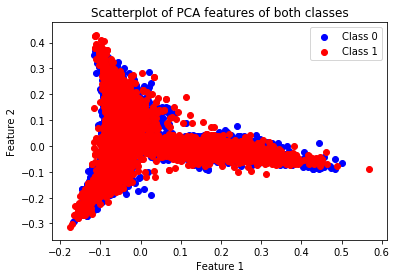

In [14]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(df_features.values))
transformed1=pd.concat([transformed,labels],axis=1)
# transformed.columns=['feature1','feature2']

print(transformed1[transformed1.labels==0].shape)

fig = plt.figure()
ax=plt.axes()

ax.scatter(transformed1[transformed1['labels']==0][0], transformed1[transformed1['labels']==0][1], label='Class 0', c='blue')
ax.scatter(transformed1[transformed1['labels']==1][0], transformed1[transformed1['labels']==1][1], label='Class 1', c='red')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatterplot of PCA features of both classes')
plt.legend()
plt.show()



The scatter plot above shows the plot of values in the new feature space of dimension 2.PCA creates a new set of features that is a linear combination of the input features As we can see that apart from the few outliers, the feature values of class 0 and 1 almost perfectly coincide. This shows that each principal component was a linear combination of highly uncorelated values.

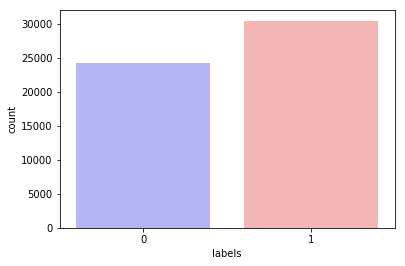

In [15]:
##drawing the countplot of the labels column
sns.countplot(x='labels',data=df_features1,palette='bwr')

The number of users with disease X are higher in number than the number of users with no disease X.

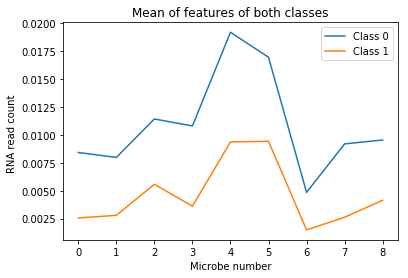

In [16]:
##plot the means of each target
new_features=pd.DataFrame(pd.concat([newFeatures,labels],axis=1))

meanLabels=new_features.groupby('labels').mean()
plt.plot(meanLabels.values[0,1:],label='Class 0')
plt.plot(meanLabels.values[1,1:],label='Class 1')

plt.title('Mean of features of both classes')
plt.xlabel("Microbe number")
plt.ylabel("RNA read count ")

plt.legend()
plt.show()

The above line graph shows the mean RNA counts (new selected features) of both classes.We can see that the average RNA read count of microbes of patients with disease is compartively lower than the RNA count of microscobes of patients without disease.

Text(0, 0.5, 'RNA read count ')

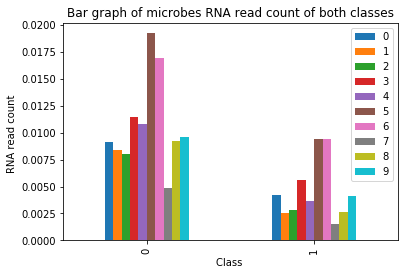

In [17]:
##Make a bar graph comparing RNA counts of patients with and without disease
meanLabels.plot.bar(title='Bar graph of microbes RNA read count of both classes')
plt.xlabel("Class ")
plt.ylabel("RNA read count ")


This bar graphs compares the mean feature (RNA read counts) values of class 0 and 1. We can see that for each microbic genome, RNA read count of patients with disease is lower than those without disease.

In [18]:
corr = newFeatures.corr()
corr.style.background_gradient(cmap='coolwarm')


,0,1,2,3,4,5,6,7,8,9
0,1,0.0981529,-0.0217387,-0.0192619,-0.0141122,-0.0334019,-0.0262736,-0.0235882,-0.019101,-0.012431
1,0.0981529,1,-0.0268696,-0.0289456,-0.0286409,-0.0416387,-0.0367819,-0.0177081,-0.0232933,-0.0303473
2,-0.0217387,-0.0268696,1,0.0466449,0.0444229,0.0504485,0.0451471,-0.0169805,0.0391272,0.0320376
3,-0.0192619,-0.0289456,0.0466449,1,0.107434,0.146501,0.131994,-0.0226934,0.0851412,-0.0315069
4,-0.0141122,-0.0286409,0.0444229,0.107434,1,0.120795,0.148716,-0.0228649,0.0970649,-0.0306497
5,-0.0334019,-0.0416387,0.0504485,0.146501,0.120795,1,0.149538,0.00506543,0.103066,-0.0463383
6,-0.0262736,-0.0367819,0.0451471,0.131994,0.148716,0.149538,1,-0.0211059,0.124259,-0.0422344
7,-0.0235882,-0.0177081,-0.0169805,-0.0226934,-0.0228649,0.00506543,-0.0211059,1,-0.0194485,-0.0202326
8,-0.019101,-0.0232933,0.0391272,0.0851412,0.0970649,0.103066,0.124259,-0.0194485,1,-0.0267582
9,-0.012431,-0.0303473,0.0320376,-0.0315069,-0.0306497,-0.0463383,-0.0422344,-0.0202326,-0.0267582,1


A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used as a way to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

Our corelation matrix shows that our data is strongly not correlated. This indicates that our features are non-redundant,which is important for model's performance.


Text(0, 0.5, 'RNA read count ')

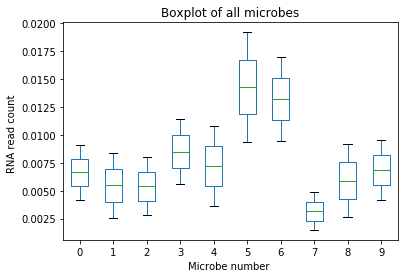

In [19]:
##
meanLabels.plot.box()
plt.title("Boxplot of all microbes")
plt.xlabel("Microbe number ")
plt.ylabel("RNA read count ")


Data Modelling:
    1) Separated the training andd the testing data with 80/20 ratio.
    2) Used Logistic Regression, Decision tree, adaboost and multi-layer perceptron classifer in our model.

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df_features.values,labels,test_size = 0.2,random_state=0)
print(x_train.shape)

##USing Logistic Regression
logR = LogisticRegression(random_state=0, solver='lbfgs').fit(x_train, y_train)
predicted=logR.predict(x_test)
print("Logistic Regression acuuracy: " + str(logR.score(x_test,y_test)))

#USING DECiSION TREE CLASSIFiER

dt=DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)
accur=dt.score(x_test,y_test)
print("Decision Tree Classifier: " + str(accur))

# ## USING ADABOOST CLASSIFER

ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
accur=ad.score(x_test,y_test)
print("Adaboost Classifier: " + str(accur))

#USING MULTI-lAYER PERCEPTRON
mlp=MLPClassifier(alpha=1)
mlp.fit(x_train,y_train)
accur=mlp.score(x_test,y_test)
print("MULTI-lAYER PERCEPTRON Classifier: " + str(accur))




(43820, 1000)
Logistic Regression acuuracy: 0.8063897763578275
Decision Tree Classifier: 0.641259698767686
Adaboost Classifier: 0.6892743039707896
MULTI-lAYER PERCEPTRON Classifier: 0.7459607485166591


Our results show that that Logistic Regression CLassifier performs best with 80.6% accuracy. We can predict that Logistic regression is a perfectly regression algorthim for a spurse uncoorelated data like this because it is more robust: the independent variables don’t have to be normally distributed, or have equal variance in each group and it can handle non-linearality pretty well.


Text(0.5, 1.0, 'Logistic Regression performance')

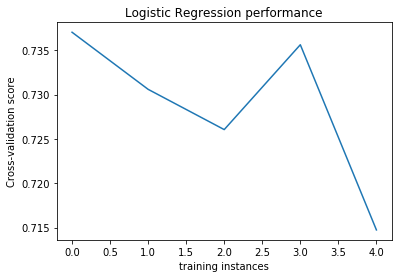

In [21]:
logScore=cross_val_score(logR, x_test, y_test, scoring='recall_macro',cv=5)
plt.plot(logScore)
plt.xlabel('training instances')
plt.ylabel('Cross-validation score')
plt.title('Logistic Regression performance')

Our results show that the model's performance is decreasing because of overfitting of data. Overfitting is a modeling error which occurs when a function is too closely fit to a limited set of data points. 

In [22]:
##this code has been taken from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
  
    print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[3224 1557]
 [ 564 5610]]


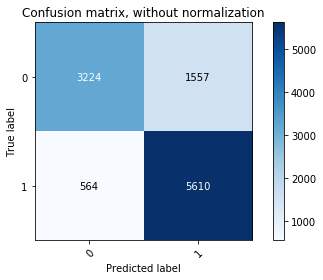

In [23]:
plot_confusion_matrix(y_test, predicted, classes=labels,
                      title='Confusion matrix, without normalization')

A confusion matrix is a summary of prediction results on a classification problem.
The number of correct and incorrect predictions are summarized with count values and broken down by each class. In this case, true positives are greater than false positives and true negatives are greater than false negatives.